به نام خدا


---

# آمار و احتمال مهندسی
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر - پاییز ۱۴۰۳

دکتر مطهری

---
## تمرین عملی - فاز ۲


نام و نام خانوادگی: مسیح شیخی

شماره دانشجویی: 402100859

In [1]:
# Additional cell code for installing libraries
#install.packages("moments")
#install.packages("ggplot2")
#install.packages("flexmix")
#install.packages("mixtools")
#install.packages("effsize")
#install.packages("dplyr")
library(dplyr)
library(effsize)
library(mixtools)
library(flexmix)
library(ggplot2)
library(moments)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


mixtools package, version 2.0.0, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).


Loading required package: lattice



<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۱: بررسی توزیع‌های احتمالی
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>10,000 نمونه از یک توزیع نرمال با میانگین 5 و انحراف معیار 2 تولید کنید.</li>
            <li>هیستوگرام داده‌های تولیدشده را رسم کنید و تابع چگالی احتمال تئوری را روی آن نمایش دهید.</li>
            <li>مقادیر میانگین، واریانس، چولگی (Skewness) و کشیدگی (Kurtosis) نمونه‌ها را محاسبه کنید.</li>
            <li>نتایج به‌دست‌آمده را تفسیر کنید.</li>
        </ol>
    </font>
</div>


Mean: 4.970631 
Variance: 4.073526 
Skewness: -0.00308255 
Kurtosis: 3.034584 


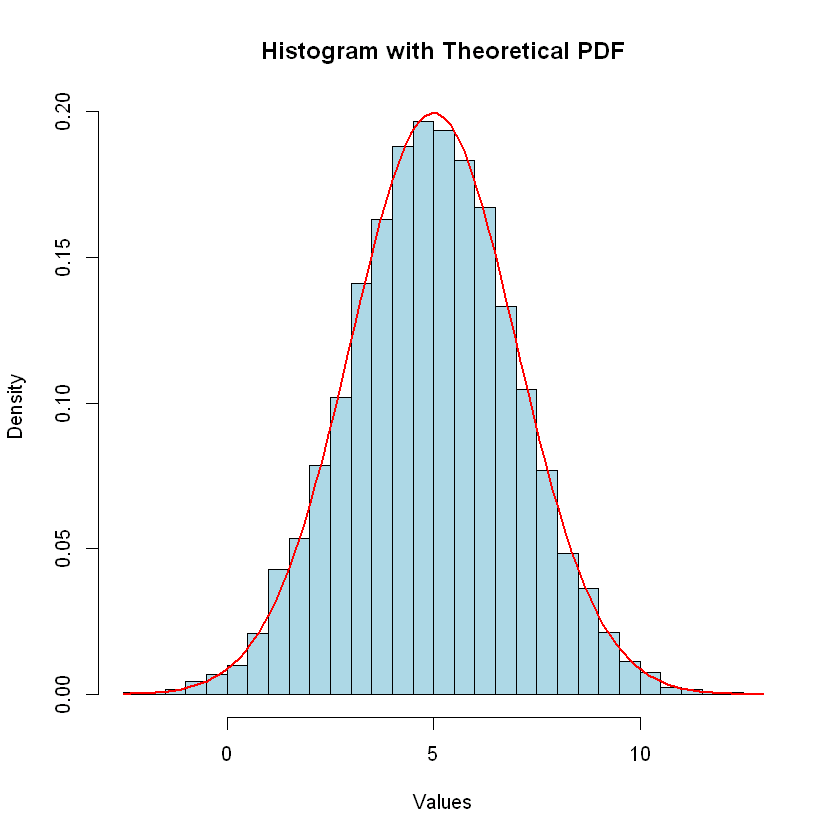

In [2]:
# 1
set.seed(402100859)
samples <- rnorm(10000, mean = 5, sd = 2)

# 2
hist(samples, breaks = 30, probability = TRUE, col = "lightblue", 
     main = "Histogram with Theoretical PDF", xlab = "Values")

curve(dnorm(x, mean = 5, sd = 2), add = TRUE, col = "red", lwd = 2)

# 3
mean_samples <- mean(samples)
variance_samples <- var(samples)
skewness_samples <- skewness(samples)
kurtosis_samples <- kurtosis(samples)

cat("Mean:", mean_samples, "\n")
cat("Variance:", variance_samples, "\n")
cat("Skewness:", skewness_samples, "\n")
cat("Kurtosis:", kurtosis_samples, "\n")


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
        <font size=3>
        بخش 4
        </font>
            <li>برای نمونه ساخته شده مقادیر انتظاری‌مان برای میانگین $μ=5$ و برای واریانس $σ^2=4$ و بدلیل اینکه توزیع‌های نرمال متقارن هستند چولگی صفر را انتظار داریم و همچنین برای یک توزیع نرمال کشیدگی برابر 3 است.</li>
    </font>
</div>


In [3]:
#4
cat("Expected Mean:", 5, "\tObserved Mean:", mean_samples, "\n")
cat("Expected Variance:", 4, "\tObserved Variance:", variance_samples, "\n")
cat("Expected Skewness:", 0, "\tObserved Skewness:", skewness_samples, "\n")
cat("Expected Kurtosis:", 3, "\tObserved Kurtosis:", kurtosis_samples, "\n")

Expected Mean: 5 	Observed Mean: 4.970631 
Expected Variance: 4 	Observed Variance: 4.073526 
Expected Skewness: 0 	Observed Skewness: -0.00308255 
Expected Kurtosis: 3 	Observed Kurtosis: 3.034584 


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            در نتایج مشهود است که بدلیل بزرگ بودن اندازه نمونه، مقادیر مورد انتظار بسیار به مقادیر بدست آمده نزدیک است.
    </font>
</div>


<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۲: استنتاج بیزی
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>فرض کنید توزیع پیشین $P(\theta) \sim Beta(2, 5)$ باشد.</li>
            <li>با توجه به یک تابع درست‌نمایی دوجمله‌ای با $n = 20$ آزمایش و $x = 7$ موفقیت، توزیع پسین را محاسبه کنید.</li>
            <li>توزیع‌های پیشین، درست‌نمایی، و پسین را رسم کنید.</li>
            <li>با استفاده از R، نمونه‌هایی از توزیع پسین شبیه‌سازی کرده و میانگین پسین و بازه اطمینان را تخمین بزنید.</li>
        </ol>
    </font>
</div>



<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            تابع درست‌نمایی دوجمله‌ای نامبرده به این شکل است: <br>
            $P(x \mid \theta) = \binom{n}{x} \theta^x (1-\theta)^{n-x}$ <br>
            $P(x \mid \theta) = 77520  . \theta^7 (1-\theta)^{13}$ <br>
            از آنجایی که برای توزیع پیشین بتا و تابع درست‌نمایی دوجمله‌ای، توزیع پسین نیز یک توزیع بتا است، <br>
            با n و x داده شده میتوان توزیع پسین را بدست آورد: <br>
            $P(\theta \mid x) = Beta(\alpha + x, \beta + n - x)$ <br>
            $P(\theta \mid x) = Beta(9, 18)$
    </font>
</div>


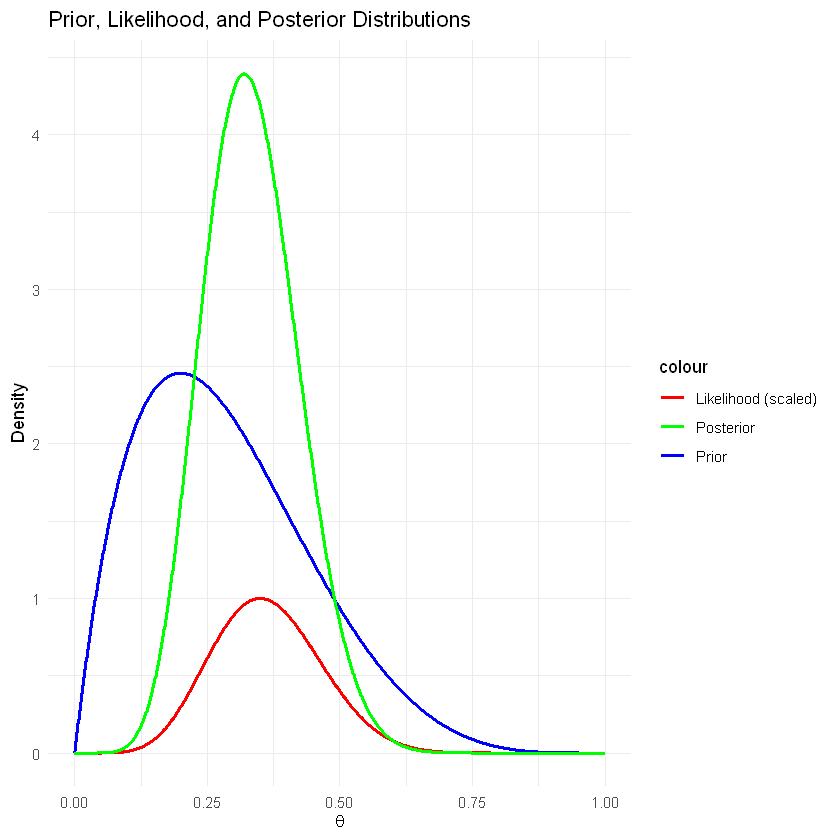

In [4]:
theta <- seq(0, 1, length.out = 1000)

prior <- dbeta(theta, 2, 5)
likelihood <- dbinom(7, 20, theta)
posterior <- dbeta(theta, 9, 18)

df <- data.frame(theta, prior, likelihood, posterior)

ggplot(df, aes(x = theta)) +
  geom_line(aes(y = prior, color = "Prior"), linewidth = 1) +
  geom_line(aes(y = likelihood / max(likelihood), color = "Likelihood (scaled)"), linewidth = 1) +
  geom_line(aes(y = posterior, color = "Posterior"), linewidth = 1) +
  labs(title = "Prior, Likelihood, and Posterior Distributions",
       x = expression(theta),
       y = "Density") +
  scale_color_manual(values = c("Prior" = "blue", "Likelihood (scaled)" = "red", "Posterior" = "green")) +
  theme_minimal()


In [5]:
posterior_samples <- rbeta(10000, 9, 18)
posterior_mean <- mean(posterior_samples)
posterior_ci <- quantile(posterior_samples, c(0.025, 0.975))

cat("Posterior Mean:", posterior_mean, "\n")
cat("95% Confidence Interval: [", posterior_ci, "]\n")


Posterior Mean: 0.3326544 
95% Confidence Interval: [ 0.1708161 0.5108692 ]


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            مقادیر تقریبی شبیه سازی شده مشاهده شد. همچنین از نظر تئوری داریم: <br>
            $\mu = \frac{\alpha}{\alpha + \beta} = \frac{9}{27} = 0.333$ <br>
            و بسته به شبیه سازی، فاصله اطمینان 95% باید تقریباً [0.48 , 0.20] باشد.
    </font>
</div>


<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        معرفی مختصر مدل‌های ترکیبی گوسی (GMM)
        </font>
        <p></p>
        <hr>
        <br/>
        مدل‌های ترکیبی گوسی (Gaussian Mixture Models - GMM) مدل‌هایی احتمالی هستند که برای نمایش داده‌هایی استفاده می‌شوند که ممکن است از ترکیب چند توزیع گوسی تشکیل شده باشند. هر مؤلفه گوسی در این ترکیب با میانگین ($\mu$)، واریانس ($\sigma^2$) و وزن ($\pi$) تعریف می‌شود که نشان‌دهنده نسبت داده‌های متعلق به آن مؤلفه است.  
        <br/><br/>
        تابع چگالی احتمال یک GMM به شکل زیر است:  
        $$p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x | \mu_k, \sigma_k^2),$$  
        که در آن $K$ تعداد مؤلفه‌ها، $\pi_k$ وزن‌ها ($\sum \pi_k = 1$) و $\mathcal{N}(x | \mu_k, \sigma_k^2)$ تابع چگالی گوسی برای مؤلفه $k$ است.  
        <br/>
        مدل‌های ترکیبی گوسی به خصوص برای خوشه‌بندی و تخمین چگالی مفید هستند و در کاربردهایی مانند بخش‌بندی تصویر و تشخیص گفتار استفاده می‌شوند.  
    </font>
</div>

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۳: بخش‌بندی تصویر با استفاده از GMM
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>داده‌های مجموعه‌ی <code>volcano</code> در R را که نشان‌دهنده داده‌های ارتفاعی است بارگذاری کنید. داده‌ها را به بازه $[0, 1]$ نرمال کنید.</li>
            <li>از مدل ترکیبی گوسی (GMM) برای بخش‌بندی این مجموعه به سه ناحیه متمایز استفاده کنید. مدل را با استفاده از بسته‌ی <code>mclust</code> در R یا کتابخانه‌ای مشابه برازش دهید.</li>
            <li>تصویر بخش‌بندی‌شده را با اختصاص هر پیکسل به مؤلفه گوسی با بیشترین احتمال نمایش دهید.</li>
            <li>نواحی بخش‌بندی‌شده را تفسیر کنید و بحث کنید که GMM چقدر ساختار داده را به خوبی مدل‌سازی کرده است.</li>
        </ol>
    </font>
</div>



number of iterations= 416 


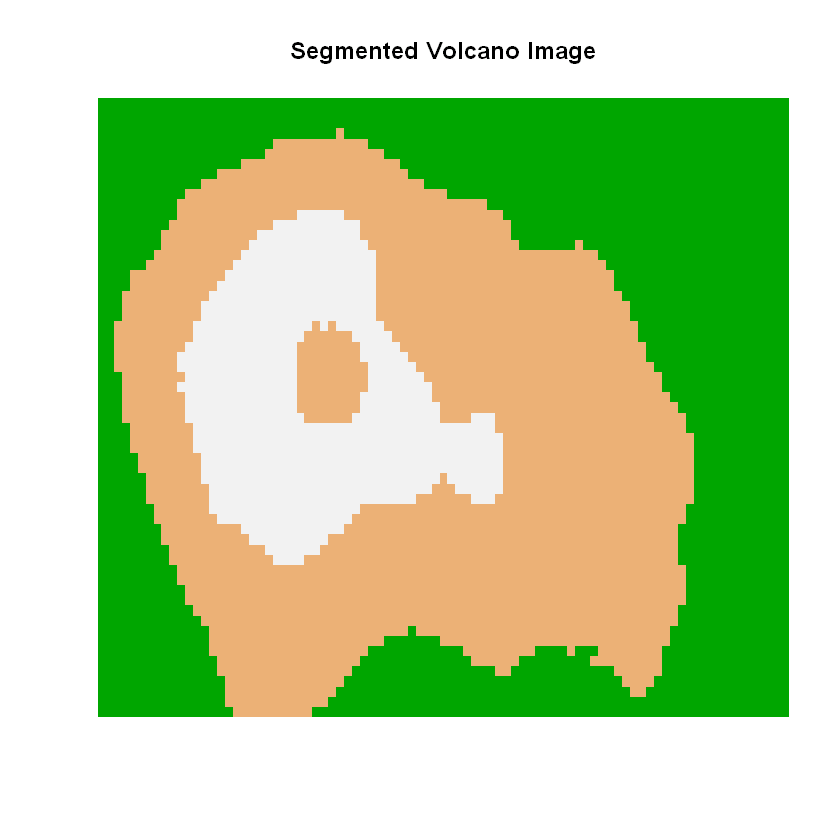

In [6]:
#1
data(volcano)
volcano_normalized <- (volcano - min(volcano)) / (max(volcano) - min(volcano))

#2
volcano_vector <- as.vector(volcano_normalized)

set.seed(123)
gmm_model <- normalmixEM(volcano_vector, k = 3)

#3
component_assignment <- apply(gmm_model$posterior, 1, which.max)

#4
segmented_image <- matrix(component_assignment, nrow = nrow(volcano), ncol = ncol(volcano))
image(segmented_image, col = terrain.colors(3), axes = FALSE, main = "Segmented Volcano Image")


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            مناطق تقسیم شده در تصویر آتشفشان تقسیم شده با سه جزء گاوسی مدل به خوبی مطابقت دارد. در واقع تقسیم بندی به طور موثری ساختار زیربنایی داده‌ها را به تصویر می‌کشد. <br>
            این مجموعه درواقع توپوگرافی مناسبی از تصاویر ثبت شده و کمک گرفتن از روشنایی و تاریکی پیکسل ها را رسم کرده است. از آنجایی که مرزهای بین خوشه ها نسبتاً هموار است، نشان می دهد GMM به طور موثر تغییرات تدریجی در ارتفاع را ثبت کرده است.
    </font>
</div>


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>استنتاج بیزی در تصمیم‌گیری</font>  
<p></p>  
<hr>  
<br/>  
استنتاج بیزی ابزاری قدرتمند برای تصمیم‌گیری در شرایط عدم قطعیت است. این سؤال شما را با روش‌های بیزی برای تحلیل یک مجموعه داده واقعی شبیه‌سازی‌شده آشنا می‌کند و به شما امکان می‌دهد احتمال‌های پسین را محاسبه کرده و تأثیر اطلاعات جدید بر باورهای اولیه را ارزیابی کنید.  
<br/><br/>  
<b>مجموعه داده:</b> از مجموعه داده شبیه‌سازی‌شده «Fault Detection Dataset» استفاده کنید. این مجموعه داده شامل اطلاعات زیر است:  
<ul>  
<li><b>Alarm:</b> فعال یا غیرفعال (هشدار سیستم)</li>  
<li><b>True_Status:</b> خرابی واقعی (خرابی وجود دارد) یا عدم خرابی (خرابی وجود ندارد)</li>  
<li><b>Machine_Age:</b> جدید، متوسط، قدیمی</li>  
<li><b>Maintenance_History:</b> اخیراً تعمیر شده، نیاز به تعمیر، بدون تعمیر</li>  
</ul>  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۴: تحلیل بیزی هشدار سیستم</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li>مجموعه داده را در R بارگذاری کرده و داده‌ها را خلاصه کنید. نرخ وقوع خرابی (Prior Probability) را محاسبه کنید.</li>  
<li>نرخ هشدار درست (True Positive Rate) و نرخ هشدار اشتباه (False Positive Rate) سیستم را محاسبه کنید.</li>  
<li>با استفاده از قضیه بیز، احتمال پسین خرابی را برای یک هشدار فعال محاسبه کنید:  
<br/>  
$$P(\text{Fault | Alarm}) = \frac{P(\text{Alarm | Fault}) \cdot P(\text{Fault})}{P(\text{Alarm})}.$$  
</li>  
<li>احتمال پسین عدم خرابی را برای یک هشدار غیرفعال محاسبه کنید.</li>  
<li>با شبیه‌سازی نرخ‌های اولیه مختلف برای وقوع خرابی (مثلاً ۱٪، ۱۰٪ و ۵۰٪)، احتمال‌های پسین را مجدداً محاسبه کرده و اثر تغییر در احتمال اولیه را بررسی کنید.</li>  
<li>یک تحلیل زیرگروه بر اساس <code>Machine_Age</code> یا <code>Maintenance_History</code> انجام دهید. احتمال‌های پسین را برای هر زیرگروه محاسبه کرده و نتایج را مقایسه کنید.</li>  
<li>یافته‌های خود را خلاصه کرده و درباره پیامدهای هشدارهای کاذب و از دست دادن هشدارهای واقعی بحث کنید. توضیح دهید که چگونه احتمال اولیه قوی می‌تواند نتایج تحلیل را تحت تأثیر قرار دهد.</li>  
</ol>  
</font>  
</div>


In [7]:
#1
data <- read.csv("https://drive.google.com/uc?id=1xHH5v_3le-8J5lttnL8hSFSmu8VyTis2")
summary(data)

prior_fault <- mean(data$True_Status == "Fault")
prior_no_fault <- 1 - prior_fault
prior_probabilities = c(prior_fault, prior_no_fault)
cat("\nPrior Fault: ", prior_fault, "\n")
cat("Prior No Fault: ", prior_no_fault, "\n")

#2
TPR <- sum(data$Alarm == "Active" & data$True_Status == "Fault") / sum(data$True_Status == "Fault")
FPR <- sum(data$Alarm == "Active" & data$True_Status == "No Fault") / sum(data$True_Status == "No Fault")
cat("True Positive Rate: ", TPR, "\n")
cat("False Positive Rate: ", FPR, "\n")

P_Alarm_given_Fault <- TPR
P_Alarm_given_NoFault <- FPR
P_NoAlarm_given_Fault <- 1 - TPR
P_NoAlarm_given_NoFault <- 1 - FPR
P_Alarm <- mean(data$Alarm == "Active")
P_NoAlarm <- 1 - P_Alarm

#3
posterior_fault_given_alarm <- (P_Alarm_given_Fault * prior_fault) / P_Alarm
cat("Posterior Fault Given Alarm: ", posterior_fault_given_alarm, "\n")

#4
posterior_no_fault_given_no_alarm <- (P_NoAlarm_given_NoFault * prior_no_fault) / P_NoAlarm
cat("Posterior No Fault Given No Alarm: ", posterior_no_fault_given_no_alarm, "\n\n")

#5
prior_list <- c(0.01, 0.1, 0.5)
posterior_results <- sapply(prior_list, function(p_fault) {
  p_no_fault <- 1 - p_fault
  p_fault_given_alarm <- (P_Alarm_given_Fault * p_fault) / ((P_Alarm_given_Fault * p_fault) + (P_Alarm_given_NoFault * p_no_fault))
  p_no_fault_given_no_alarm <- (P_NoAlarm_given_NoFault * p_no_fault) / ((P_NoAlarm_given_Fault * p_fault) + (P_NoAlarm_given_NoFault * p_no_fault))
  return(c(p_fault_given_alarm, p_no_fault_given_no_alarm))
})
colnames(posterior_results) <- paste0("Prior_", prior_list)
posterior_results

#6
compute_posterior <- function(subgroup_data) {
  prior_fault <- mean(subgroup_data$True_Status == "Fault")
  prior_no_fault <- 1 - prior_fault
  TPR <- sum(subgroup_data$Alarm == "Active" & subgroup_data$True_Status == "Fault") / sum(subgroup_data$True_Status == "Fault")
  FPR <- sum(subgroup_data$Alarm == "Active" & subgroup_data$True_Status == "No Fault") / sum(subgroup_data$True_Status == "No Fault")
  P_Alarm <- mean(subgroup_data$Alarm == "Active")
  P_NoAlarm <- 1 - P_Alarm
  P_NoAlarm_given_NoFault <- 1 - FPR
  P_Alarm_given_Fault <- TPR
  
  posterior_fault_given_alarm <- (P_Alarm_given_Fault * prior_fault) / P_Alarm
  posterior_no_fault_given_no_alarm <- (P_NoAlarm_given_NoFault * prior_no_fault) / P_NoAlarm
  return(c(posterior_fault_given_alarm, posterior_no_fault_given_no_alarm))
} 

unique_ages <- unique(data$Machine_Age)
unique_maintenance <- unique(data$Maintenance_History)
results_list <- list()

for (age in unique_ages) {
  for (maintenance in unique_maintenance) {
    subgroup_data <- subset(data, Machine_Age == age & Maintenance_History == maintenance)
    posteriors <- compute_posterior(subgroup_data)
    
    results_list <- append(results_list, list(data.frame(
      Machine_Age = age,
      Maintenance_History = maintenance,
      P_Fault_Given_Alarm = posteriors[1],
      P_NoFault_Given_NoAlarm = posteriors[2]
    )))
  }
}
results <- do.call(rbind, results_list)
results

 Machine_Age        Maintenance_History True_Status           Alarm          
 Length:10000       Length:10000        Length:10000       Length:10000      
 Class :character   Class :character    Class :character   Class :character  
 Mode  :character   Mode  :character    Mode  :character   Mode  :character  


Prior Fault:  0.1562 
Prior No Fault:  0.8438 
True Positive Rate:  0.8886044 
False Positive Rate:  0.04930078 
Posterior Fault Given Alarm:  0.7694013 
Posterior No Fault Given No Alarm:  0.9787701 



Prior_0.01,Prior_0.1,Prior_0.5
0.1540207,0.6669645,0.9474352
0.9988178,0.9871482,0.8951170


Machine_Age,Maintenance_History,P_Fault_Given_Alarm,P_NoFault_Given_NoAlarm
<chr>,<chr>,<dbl>,<dbl>
Mid,Needs Repair,0.7421203,0.9861195
Mid,Recently Repaired,0.5104167,0.9962477
Mid,No Maintenance,0.8971193,0.9555950
New,Needs Repair,0.5285714,0.9931787
New,Recently Repaired,0.2275132,0.9974016
New,No Maintenance,0.6153846,0.9852507
Old,Needs Repair,0.8883929,0.9513109
Old,Recently Repaired,0.6086957,0.9936709
Old,No Maintenance,0.9623656,0.8274336


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            در ابتدا با کمک گرفتن از داده‌ها احتمالات پیشین خطا را محاسبه کردیم. سپس با استفاده از فرمول احتمال شرطی و قانون بیز این امکان به وجود آمد که تمام احتمالات پسین شرطی خواسته شده را محاسبه کنیم.<br>
            بعد از این، احتمالات پیشین را به صورت دستی وارد میکنیم و احتمالات پسین را به کمک این فرمول ها محاسبه میکنیم:<br>
            $P(\text{Fault | Alarm}) = \frac{P(\text{Alarm | Fault}) \cdot P(\text{Fault})}{P(\text{Alarm | Fault}) \cdot P(\text{Fault}) + P(\text{Alarm | NoFault}) \cdot P(\text{NoFault})}$<br>
            $P(\text{NoFault | NoAlarm}) = \frac{P(\text{NoAlarm | NoFault}) \cdot P(\text{NoFault})}{P(\text{NoAlarm | Fault}) \cdot P(\text{Fault}) + P(\text{NoAlarm | NoFault}) \cdot P(\text{NoFault})}$<br>
            در بخش آخر نیز دیتاست را به زیرگروه‌های جدا تقسیم میکنیم و مراحلی که برای محاسبه احتمال پسین طی کردیم روی هر زیرگروه اجرا میکنیم.<br>
            از اطلاعات نهایی بدست آمده میتوان نتیجه گرفت که فرض کردن درست احتمال پیشین و اولیه تاثیر بسیار زیادی در احتمالات نهایی دارند. چرا که میتوان دید اگر احتمال پیشین خیلی پایین باشد معمولا آلارم کاذب خواهیم داشت. یا به شکلی دیگر، اگر از ابتدا باور داشته باشیم خرابی زیاد رخ میدهد، هر آلارم فعال قابل اعتماد تر خواهد بود.
    </font>
</div>


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مقایسه میانگین گروه‌ها با آزمون t: تحلیل نمرات آزمون</font>  
<p></p>  
<hr>  
<br/>  
آزمون‌های آماری مانند آزمون t برای تعیین تفاوت معنادار بین میانگین‌های دو گروه استفاده می‌شوند. در این سؤال، شما از آزمون t برای تحلیل نمرات آزمون دو گروه از دانش‌آموزان استفاده خواهید کرد.  
<br/><br/>  
<b>مجموعه داده:</b> از یک مجموعه داده شبیه‌سازی‌شده یا داده‌ای که شامل اطلاعات زیر باشد استفاده کنید:  
<ul>  
<li><b>Student ID:</b> شناسه دانش‌آموز</li>  
<li><b>Group:</b> کلاس آنلاین یا کلاس حضوری</li>  
<li><b>Score:</b> نمره آزمون</li>  
</ul>  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۵: تحلیل تأثیر روش تدریس بر نمرات آزمون</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>کاوش داده‌ها:</b>  
   <ul>  
     <li>مجموعه داده را در R بارگذاری کرده و آمار توصیفی نمرات هر گروه (میانگین، انحراف معیار و ...) را محاسبه کنید.</li>  
     <li>توزیع نمرات برای هر دو گروه را با استفاده از نمودار جعبه‌ای (Boxplot) بصری‌سازی کنید.</li>  
   </ul>  
</li>  
<li><b>اجرای آزمون t:</b>  
   <ul>  
     <li>یک آزمون t مستقل دو نمونه‌ای انجام دهید تا مشخص شود آیا تفاوت معناداری بین میانگین نمرات دو گروه وجود دارد یا خیر.</li>  
     <li>فرضیه‌ها را به این صورت تعریف کنید:  
       <ul>  
         <li><b>فرض صفر (H<sub>0</sub>):</b> میانگین نمرات دو گروه برابر است.</li>  
         <li><b>فرض مقابل (H<sub>1</sub>):</b> میانگین نمرات دو گروه برابر نیست.</li>  
       </ul>  
     </li>  
   </ul>  
</li>  
<li><b>تفسیر نتایج:</b>  
   <ul>  
     <li>آماره t، درجه آزادی (Degrees of Freedom) و مقدار p را گزارش کنید.</li>  
     <li>بر اساس مقدار p، مشخص کنید که در سطح معناداری ۵٪، فرض صفر رد می‌شود یا خیر.</li>  
   </ul>  
</li>  
<li><b>اندازه اثر (امتیازی):</b>  
   <ul>  
     <li>شاخص اندازه اثر کوهن (Cohen's d) را برای اندازه‌گیری میزان تفاوت بین دو گروه محاسبه کنید.</li>  
   </ul>  
</li>  
<li><b>بحث و نتیجه‌گیری:</b>  
   <ul>  
     <li>یافته‌های خود را خلاصه کنید.</li>  
     <li>توضیح دهید که آیا روش تدریس (آنلاین در مقابل حضوری) تأثیر معناداری بر نمرات آزمون داشته است یا خیر.</li>  
     <li>به محدودیت‌های احتمالی این تحلیل اشاره کنید (مانند اندازه نمونه، عوامل مداخله‌گر دیگر).</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>  

# A tibble: 2 × 8
  Group      Mean    SD Median  Mode   Min   Max     N
  <chr>     <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl> <int>
1 In-Person  75.4  9.17   74.3  61.8  61.8  97.0    44
2 Online     69.4  9.18   69.0  53.3  53.3  91.9    56

	Two Sample t-test

data:  Score by Group
t = 3.2929, df = 98, p-value = 0.00138
alternative hypothesis: true difference in means between group In-Person and group Online is not equal to 0
95 percent confidence interval:
 2.417854 9.752295
sample estimates:
mean in group In-Person    mean in group Online 
               75.44596                69.36089 

T-statistic: 3.292857 
Degrees of freedom: 98 
P-value: 0.001380203 
Conclusion: Reject the null hypothesis (H0).
Cohen's d: 0.6633649 


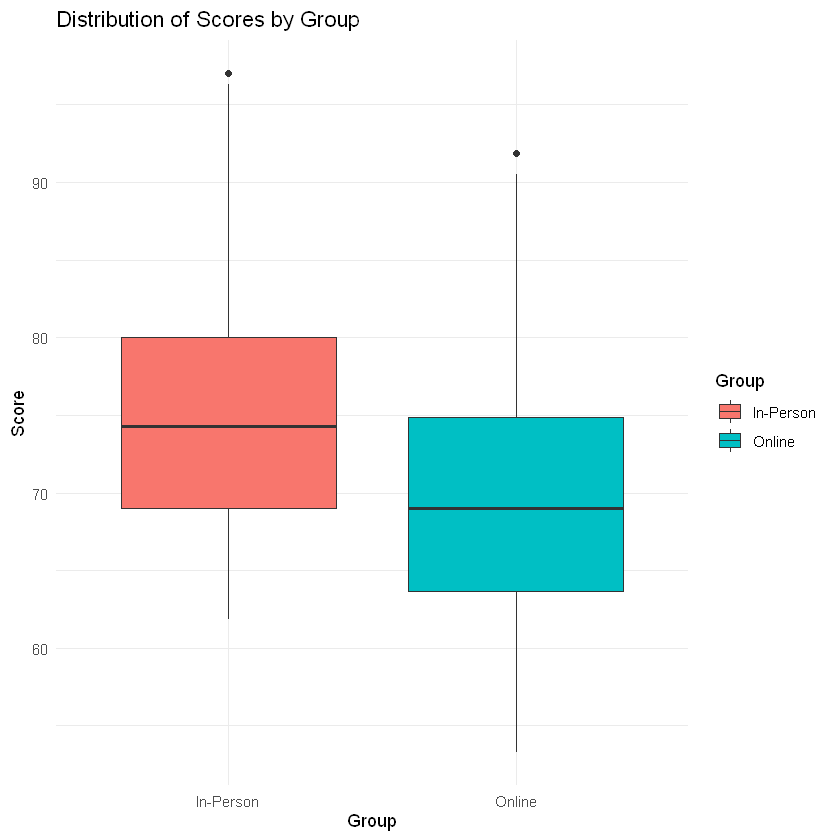

In [8]:
n_students <- 100
Student_ID <- 1:n_students
Group <- sample(c("Online", "In-Person"), n_students, replace = TRUE)
Score <- ifelse(Group == "Online", rnorm(n_students, mean = 70, sd = 10), rnorm(n_students, mean = 75, sd = 10))
data <- data.frame(Student_ID, Group, Score)

# 1
desc_stats <- data %>%
  group_by(Group) %>%
  summarise(
    Mean = mean(Score),
    SD = sd(Score),
    Median = median(Score),
    Mode = as.numeric(names(sort(table(Score), decreasing = TRUE)[1])),  # Calculate mode
    Min = min(Score),
    Max = max(Score),
    N = n()
  )
print(desc_stats)

ggplot(data, aes(x = Group, y = Score, fill = Group)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Distribution of Scores by Group", x = "Group", y = "Score")

# 2
t_test_result <- t.test(Score ~ Group, data = data, var.equal = TRUE)
print(t_test_result)

# 3
t_statistic <- t_test_result$statistic
df <- t_test_result$parameter
p_value <- t_test_result$p.value
cat("T-statistic:", t_statistic, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value, "\n")

alpha <- 0.05
if (p_value < alpha) {
  cat("Conclusion: Reject the null hypothesis (H0).\n")
} else {
  cat("Conclusion: Fail to reject the null hypothesis (H0).\n")
}

# 4
cohen_d <- cohen.d(Score ~ Group, data = data)
cat("Cohen's d:", cohen_d$estimate, "\n")


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            <br>
همانطور که مشاهده شد با کمتر بودن آماره نسبت به سطح معناداری تست، متوجه میشویم که تفاوت آماری معنی داری در نمرات آزمون بین گروه آنلاین و حضوری وجود دارد و در واقع فرض صفر رد میشود. <br>
<br>
از نظر اندازه نمونه شبیه سازی شده یک نمونه بزرگتر ممکن است نتایج قابل اعتمادتری ارائه دهد؛ لذا اندازه نمونه محدودیت تاثیر گذاری در نتایج است، هر چند میتوان با تخمین خوبی خطا های آن را پوشش داد.<br>
از آنجایی نمونه ما بسیار بزرگ نیست و داده های ما در دنیای واقعی اتفاق میفتند، نمیتوانیم اثر شرطی متغیرهای دیگر (مثلاً انگیزه دانش آموز، دانش قبلی، سطح دسترسی، رفاه و...) را نادیده بگیریم و آنها را مستقل بپنداریم. اما با تقریب خوبی میتوان از آن چشم پوشی کرد.<br>
از طرفی دیگر ما در آزمون t واریانس مساوی را برای هر دو گروه در نظر گرفتیم که ممکن است در داده های دنیای واقعی وجود نداشته باشد.
    </font>
</div>


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی حرکت تصادفی: تحلیل و رسم مسیر</font>  
<p></p>  
<hr>  
<br/>  
<b>حرکت تصادفی (Random Walk)</b> مدلی ریاضی است که مسیرهایی را توصیف می‌کند که در آن هر گام به صورت تصادفی برداشته می‌شود. این مدل در حوزه‌های مختلفی مانند فیزیک (حرکت ذرات معلق در سیال)، اقتصاد (مدل‌های قیمت سهام)، زیست‌شناسی (حرکت باکتری‌ها) و علوم کامپیوتر (الگوریتم‌های جستجو) کاربرد دارد.  
<br/><br/>  
<b>مثال‌ها:</b>  
<ul>  
<li>حرکت تصادفی ذرات در محیط مایع (جنبش براونی).</li>  
<li>پیش‌بینی مسیرهای احتمالی در بازار سهام.</li>  
<li>الگوهای جستجوی حیوانات برای غذا.</li>  
</ul>  
<br/>  
در این سؤال، یک حرکت تصادفی در فضای دوبعدی را شبیه‌سازی خواهید کرد و نمودار مسیر آن را رسم می‌کنید.  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۶: شبیه‌سازی حرکت تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>مدل‌سازی حرکت تصادفی:</b>  
   <ul>  
     <li>فرض کنید در هر مرحله، جابجایی‌ها مستقل و به صورت تصادفی انجام می‌شوند و توسط بردار <code>X<sub>i</sub></code> مشخص می‌شوند.</li>  
     <li>احتمال جابجایی در هر گام به صورت زیر تعریف شده است:</li>  
\[
P(X_i = x_i) =
\begin{cases} 
[1, 0]^T   & p = 0.1 \\
[-1, 0]^T  & p = 0.1 \\
[0, 1]^T   & p = 0.1 \\
[0, -1]^T  & p = 0.1 \\
[1, 1]^T   & p = 0.1 \\
[-1, -1]^T & p = 0.1 \\
[1, -1]^T  & p = 0.1 \\
[-1, 1]^T  & p = 0.1 \\
[0, 0]^T   & p = 0.2 \\
\text{otherwise} & p = 0
\end{cases}
\]
     <li>هر گام می‌تواند به یکی از جهات اصلی (بالا، پایین، چپ، راست)، جهات مورب یا بدون حرکت انجام شود.</li>  
   </ul>  
</li>  
<li><b>شبیه‌سازی حرکت:</b>  
   <ul>  
     <li>مسیر را برای مقادیر مختلف <code>n</code> (تعداد گام‌ها) شبیه‌سازی کنید: <code>n = 10, 100, 1000, 10000</code>.</li>  
     <li>نمودار موقعیت مکانی را ترسیم کنید:</li>  
     <ul>  
       <li><b>محور x:</b> موقعیت افقی در هر گام.</li>  
       <li><b>محور y:</b> موقعیت عمودی در هر گام.</li>  
       <li><b>توضیح:</b> هر نقطه در نمودار نشان‌دهنده موقعیت جغرافیایی پس از هر گام است و خط بین نقاط نشان‌دهنده مسیر حرکت است.</li>  
     </ul>  
   </ul>  
</li>  
<li><b>تحلیل تأثیر تعداد گام‌ها:</b>  
   <ul>  
     <li>فرض کنید تعداد گام‌ها در هر مرحله ثابت نیست و می‌تواند مقدار تصادفی بین <code>1</code> و <code>20</code> با توزیع یکنواخت باشد.</li>  
     <li>نمودار حرکت را برای مقادیر مختلف <code>n</code> ترسیم کنید: <code>n = 10, 100, 1000</code>.</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>  


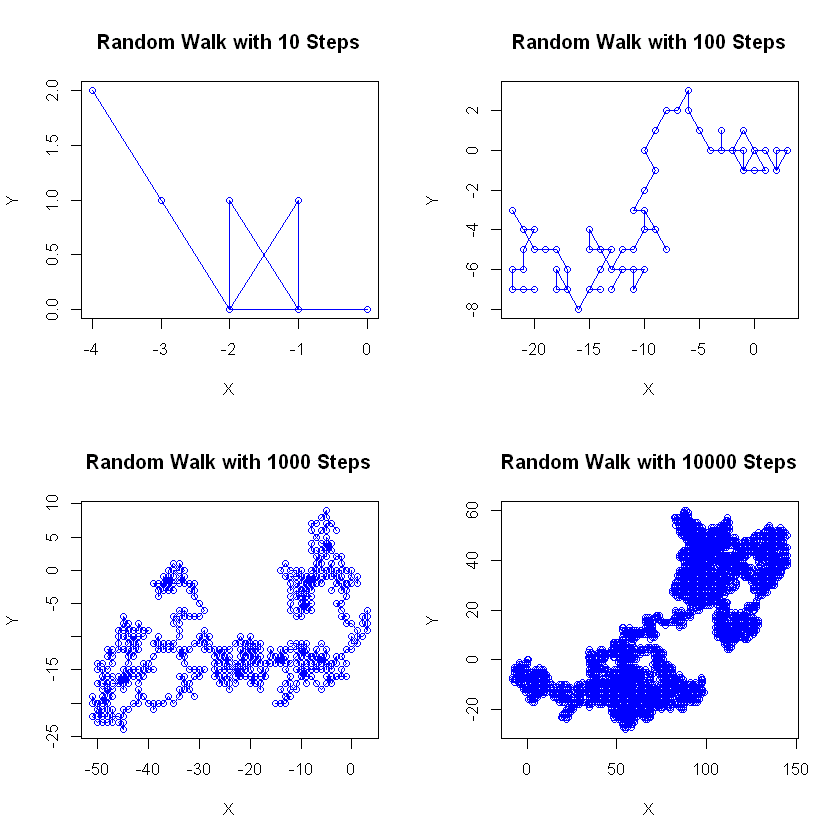

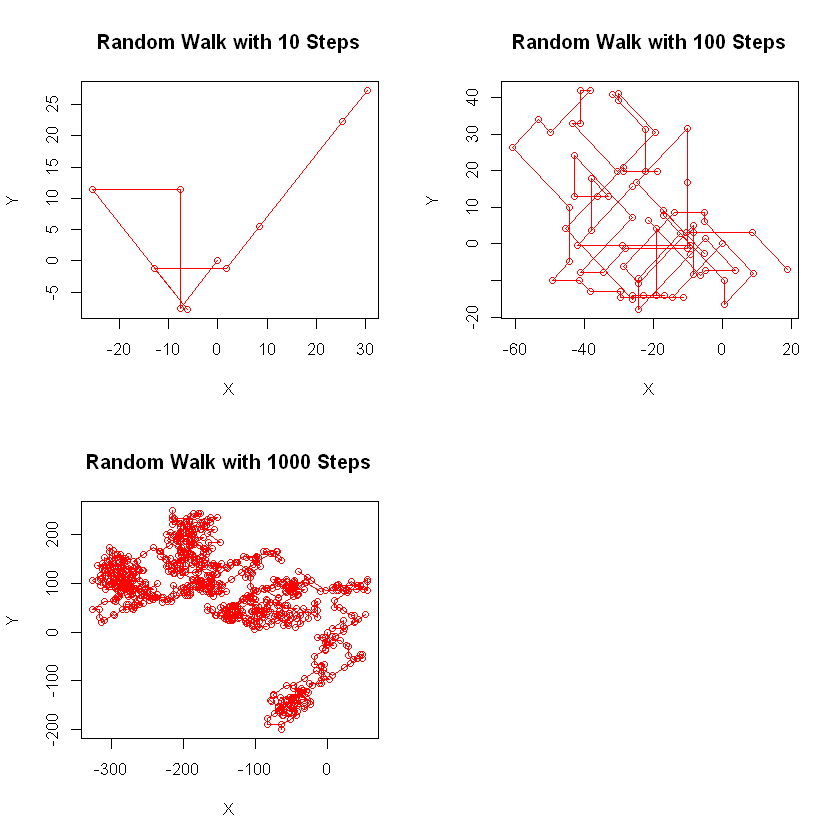

In [9]:
# 1
movements <- list(
  c(1, 0),   
  c(-1, 0),  
  c(0, 1),   
  c(0, -1),  
  c(1, 1),   
  c(-1, -1), 
  c(1, -1),  
  c(-1, 1),  
  c(0, 0)    
)

probabilities <- c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)
simulate_random_walk <- function(n_steps) {
  position <- matrix(c(0, 0), nrow = 1, ncol = 2)
  for (i in 1:n_steps) {
    move <- sample(1:length(movements), 1, prob = probabilities)
    new_position <- position[i, ] + movements[[move]]
    position <- rbind(position, new_position)
  }
  return(position)
}

n_steps <- c(10, 100, 1000, 10000)
par(mfrow = c(2, 2))
for (n in n_steps) {
  path <- simulate_random_walk(n)
  plot(path[, 1], path[, 2], type = "o", col = "blue", 
       xlab = "X", ylab = "Y", main = paste("Random Walk with", n, "Steps"),
       xlim = range(path[, 1]), ylim = range(path[, 2]))
}

# 2
simulate_random_walk_random_step <- function(n_steps) {
  position <- matrix(c(0, 0), nrow = 1, ncol = 2)
    for (i in 1:n_steps) {
    move <- sample(1:length(movements), 1, prob = probabilities)
    step_size <- runif(1, 1, 20) 
    new_position <- position[i, ] + step_size * movements[[move]]
    position <- rbind(position, new_position)
  }
  return(position)
}

n_steps <- c(10, 100, 1000)
par(mfrow = c(2, 2))
for (n in n_steps) {
  path <- simulate_random_walk_random_step(n)
  plot(path[, 1], path[, 2], type = "o", col = "red", 
       xlab = "X", ylab = "Y", main = paste("Random Walk with", n, "Steps"),
       xlim = range(path[, 1]), ylim = range(path[, 2]))
}


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی تغییرات دما: تحلیل و بررسی مدل</font>  
<p></p>  
<hr>  
<br/>  
<b>مدل تغییرات دمای تصادفی (Random Walk in Temperature)</b> مدلی است که برای توصیف تغییرات روزانه دما استفاده می‌شود. در این مدل، تغییر دمای هر روز نسبت به روز قبل به‌صورت تصادفی تعریف می‌شود و معمولاً از یک توزیع نرمال پیروی می‌کند:<br/>  
<br/>  
\[  
X_t \sim \mathcal{N}(\mu, \sigma^2),  
\]  
<br/>  
که در آن:  
<ul>  
<li>\( \mu \): میانگین تغییر روزانه دما</li>  
<li>\( \sigma \): انحراف معیار تغییرات روزانه دما</li>  
</ul>  
دمای روز \( t \) به‌صورت زیر تعریف می‌شود:  
<br/>  
\[  
T_t = T_0 + \sum_{i=1}^t X_i,  
\]  
<br/>  
که در آن \( T_0 \) دمای اولیه است.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۷: تحلیل تغییرات دمای تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>شبیه‌سازی تغییرات دما:</b>  
   <ul>  
     <li>دمای روزانه را برای <b>۱۰۰۰ مسیر مستقل تصادفی</b> با پارامترهای زیر شبیه‌سازی کنید:</li>  
     <ul>  
       <li>دمای اولیه (\( T_0 \)): ۱۵°C</li>  
       <li>میانگین تغییر روزانه (\( \mu \)): ۰°C</li>  
       <li>انحراف معیار تغییرات روزانه (\( \sigma \)): ۳°C</li>  
       <li>تعداد روزها (\( T \)): ۳۶۵ (یک سال)</li>  
     </ul>  
     <li>میانگین نتایج را تحلیل کرده و نمودار یک مسیر نمونه را رسم کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>افزودن روند فصلی:</b>  
   <ul>  
     <li>مدل را برای افزودن روند فصلی تغییر دهید:</li>  
     <br/>  
     \[  
     T_t = T_0 + \sum_{i=1}^t X_i + 10 \sin\left(\frac{2 \pi t}{365}\right),  
     \]  
     <br/>  
     <li>مدل جدید را برای <b>۱۰۰۰ مسیر</b> شبیه‌سازی کنید.</li>  
     <li>نمودار یک مسیر نمونه و میانگین مسیرها را ترسیم کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل آماری:</b>  
   <ul>  
     <li>میانگین و واریانس دمای شبیه‌سازی‌شده در پایان سال (\( t = 365 \)) را محاسبه کنید.</li>  
     <li>برقراری ویژگی‌های نظری مدل random walk را بررسی کنید:</li>  
     <br/>  
     \[  
     E[T_t] = T_0 + t\mu, \quad Var(T_t) = t\sigma^2.  
     \]  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل زمان عبور:</b>  
   <ul>  
     <li>زمان اولین عبور دما از ۳۰°C (\( T_H \)) را برای <b>۱۰۰۰ مسیر مستقل</b> تعیین کنید.</li>  
     <li>میانگین زمان عبور را محاسبه کنید.</li>  
     <li>تأثیر \( \mu \) و \( \sigma \) بر زمان عبور را توضیح دهید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل سیستم هشدار:</b>  
   <ul>  
     <li>فرض کنید اگر دما برای سه روز متوالی به کمتر از ۵-°C برسد، سیستم هشدار فعال می‌شود.</li>  
     <li>شبیه‌سازی را برای <b>۱۰۰۰ مسیر تصادفی</b> انجام دهید.</li>  
     <li>نسبت سال‌هایی که هشدار فعال می‌شود را محاسبه کنید.</li>  
     <li>نتایج را تحلیل کنید.</li>  
   </ul>  
</li>  
<br/>  
</ol>  
</font>  
</div>


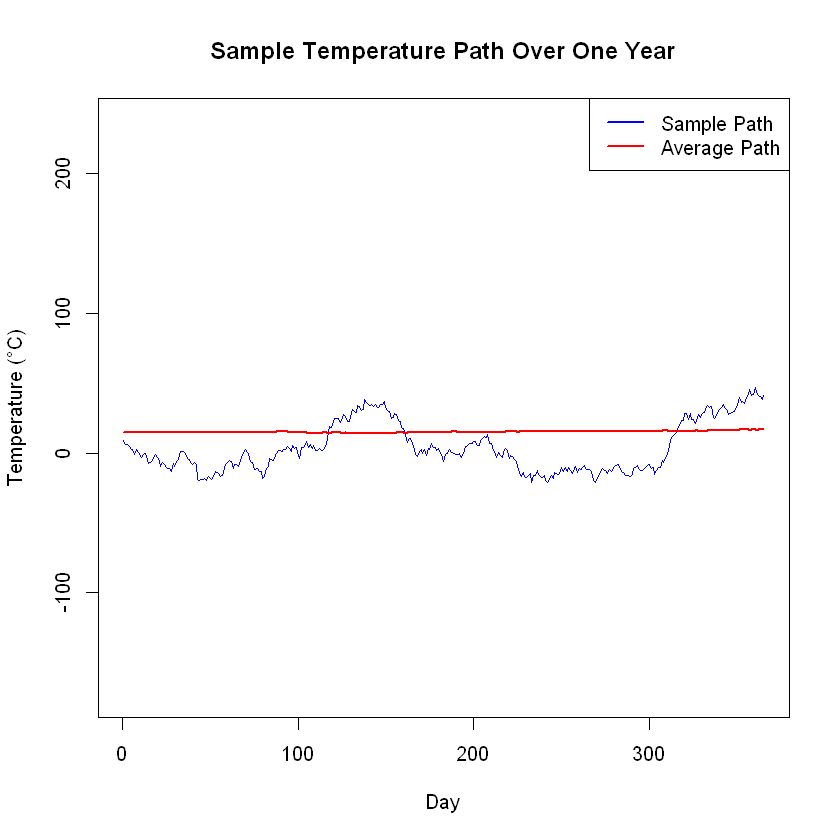

Simulated Mean at t = 365: 16.79698 
Theoretical Mean at t = 365: 15 
Simulated Variance at t = 365: 3002.164 
Theoretical Variance at t = 365: 3285 

Average transit time to reach 30 °C: 71.10158 days


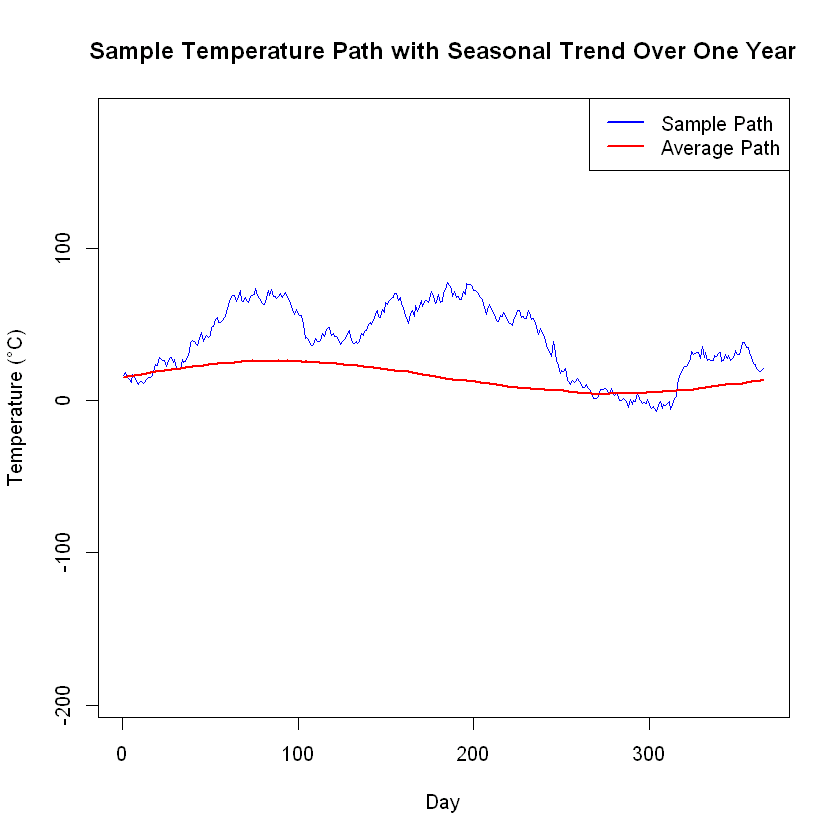

Proportion of years with warning activation: 0.693 


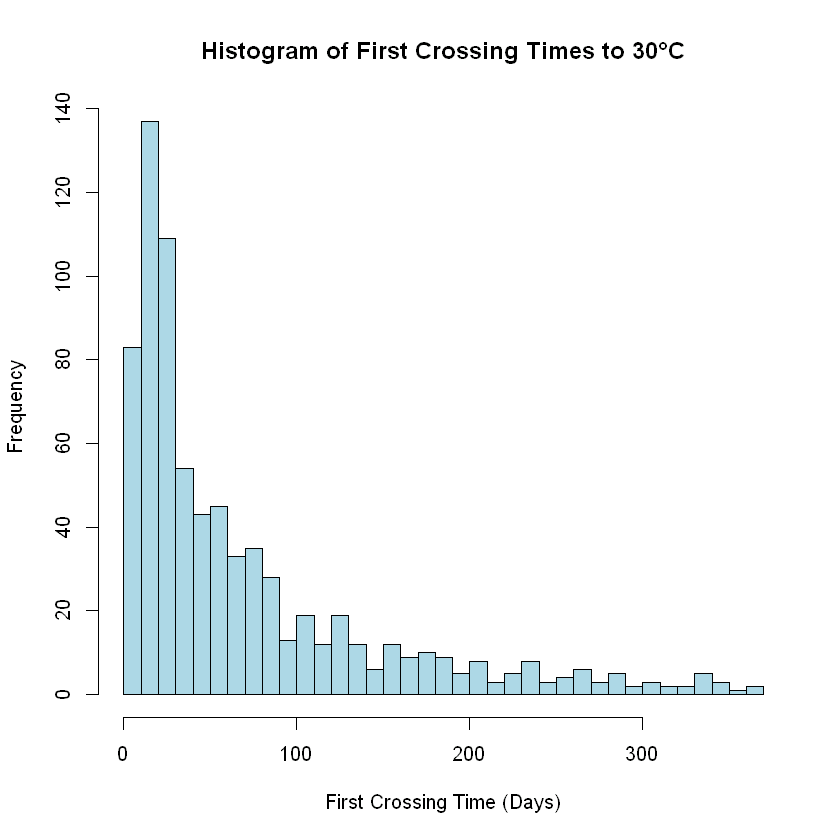

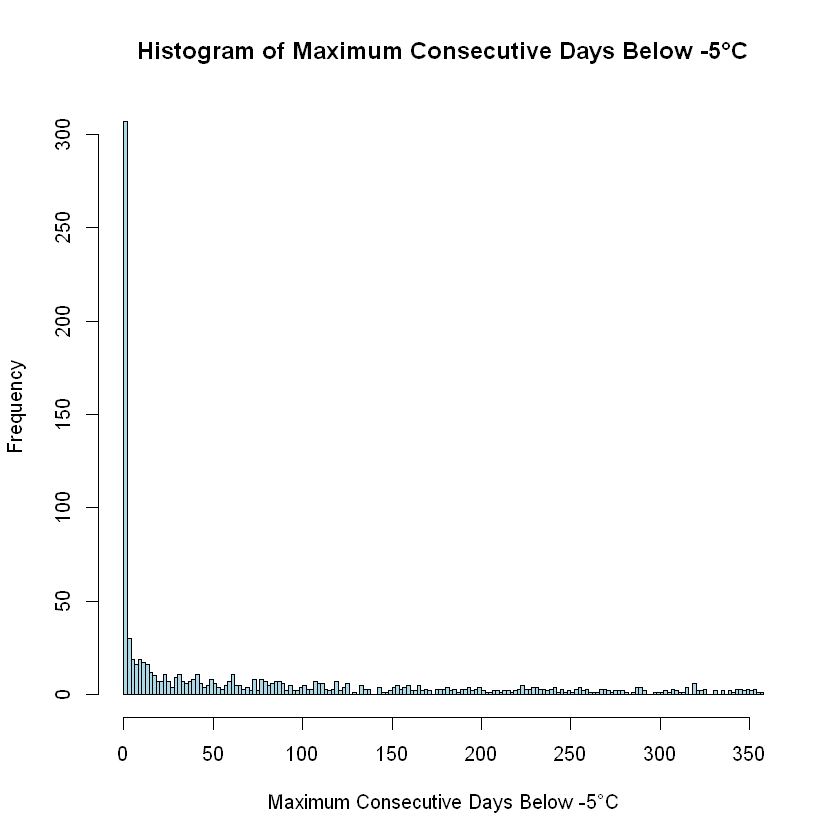

In [10]:
# 1
T0 <- 15   
mu <- 0       
sigma <- 3   
T <- 365    
n_paths <- 1000

temperature_paths <- matrix(NA, nrow = T, ncol = n_paths)
for (i in 1:n_paths) {
  daily_changes <- rnorm(T, mean = mu, sd = sigma)
  temperature_paths[, i] <- T0 + cumsum(daily_changes)
}

average_temperature <- rowMeans(temperature_paths)
sample_path <- temperature_paths[, 1]
plot(1:T, sample_path, type = "l", col = "blue",
     xlab = "Day", ylab = "Temperature (°C)",
     main = "Sample Temperature Path Over One Year",
     ylim = range(temperature_paths))

lines(1:T, average_temperature, col = "red", lwd = 2)

legend("topright", legend = c("Sample Path", "Average Path"),
       col = c("blue", "red"), lty = 1, lwd = 2)


# 2
temperature_paths_seasonal <- matrix(NA, nrow = T, ncol = n_paths)

for (i in 1:n_paths) {
  daily_changes <- rnorm(T, mean = mu, sd = sigma)
  cumulative_temperature <- T0 + cumsum(daily_changes)
  seasonal_trend <- 10 * sin(2 * pi * (1:T) / 365)
  temperature_paths_seasonal[, i] <- cumulative_temperature + seasonal_trend
}

average_temperature_seasonal <- rowMeans(temperature_paths_seasonal)
sample_path_seasonal <- temperature_paths_seasonal[, 1]
plot(1:T, sample_path_seasonal, type = "l", col = "blue",
     xlab = "Day", ylab = "Temperature (°C)",
     main = "Sample Temperature Path with Seasonal Trend Over One Year",
     ylim = range(temperature_paths_seasonal))

lines(1:T, average_temperature_seasonal, col = "red", lwd = 2)
legend("topright", legend = c("Sample Path", "Average Path"),
       col = c("blue", "red"), lty = 1, lwd = 2)


# 3
final_temperatures <- temperature_paths[T, ]
mean_final_temp <- mean(final_temperatures)
var_final_temp <- var(final_temperatures)

theoretical_mean <- T0 + T * mu
theoretical_var <- T * sigma^2

cat("Simulated Mean at t = 365:", mean_final_temp, "\n")
cat("Theoretical Mean at t = 365:", theoretical_mean, "\n")
cat("Simulated Variance at t = 365:", var_final_temp, "\n")
cat("Theoretical Variance at t = 365:", theoretical_var, "\n\n")


# 4
T_H <- 30
first_crossing_times <- numeric(n_paths)

for (i in 1:n_paths) {
  daily_changes <- rnorm(T, mean = mu, sd = sigma)
  temperature_path <- T0 + cumsum(daily_changes)
  crossing_index <- which(temperature_path >= T_H)[1]
  first_crossing_times[i] <- ifelse(is.na(crossing_index), NA, crossing_index)
}

average_transit_time <- mean(first_crossing_times, na.rm = TRUE)
cat("Average transit time to reach", T_H, "°C:", average_transit_time, "days\n")

hist(first_crossing_times, breaks = 30, col = "lightblue",
     xlab = "First Crossing Time (Days)", ylab = "Frequency",
     main = "Histogram of First Crossing Times to 30°C")


# 5
threshold <- -5 
consecutive_days <- 3  
warning_activated <- logical(n_paths)  
consecutive_counts <- numeric(n_paths) 

for (i in 1:n_paths) {
  daily_changes <- rnorm(T, mean = mu, sd = sigma)
  temperature_path <- T0 + cumsum(daily_changes)
  below_threshold <- temperature_path < threshold
  rle_below <- rle(below_threshold)
  warning_activated[i] <- any(rle_below$values & rle_below$lengths >= consecutive_days)
  if (any(rle_below$values)) {
    consecutive_counts[i] <- max(rle_below$lengths[rle_below$values])
  } else {
    consecutive_counts[i] <- 0 
  }
}

proportion_warning <- mean(warning_activated)
cat("Proportion of years with warning activation:", proportion_warning, "\n")
hist(consecutive_counts, breaks = 200, col = "lightblue",
     xlab = "Maximum Consecutive Days Below -5°C", ylab = "Frequency",
     main = "Histogram of Maximum Consecutive Days Below -5°C")


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            در بخش سوم سوال، قابل مشاهده است که واریانس و میانگین هر دو با تقریب نسبتا خوبی، مقادیر تئوری و عملی نزدیکی دارند.<br>
            در بخش چهار، تاثیری که میانگین دارد به شکلی است که اگر میانگین مثبت را شاهد باشیم دما در گذر زمان تمایل به افزایش دارد که به طور متوسط باعث کاهش زمان گذر میشود. به شکل مشابه با میانگین منفی میتوانیم شاهد افزایش زمان گذر باشیم و با میانگین صفر نیز میدانیم که دما حول مقدار اولیه آن در نوسان خواهد بود و به طور متوسط ثابت میماند. همچنین میدانیم که انحراف معیار نوسانات تصادفی را نشان میدهد و در صورتی انحراف معیار بالا باشد میتوانیم شاهد زمان گذر بسیار طولانی تر یا بسیار کوتاه تر از مقادیر انتظاری باشیم.<br>
            نسبت سالهایی که هشدار به صدا در میاید در واقع همان احتمال کاهش دما به زیر منفی 5 درجه در سه روز متوالی است. که مشاهده میشود تقریبا بیشتر مواقع شاهد این مورد بوده ایم.
    </font>
</div>


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی حرکت تصادفی: احتمال بازگشت به مبدأ</font>  
<p></p>  
<hr>  
<br/>  
<b>مدل حرکت تصادفی در چهار جهت</b> مدلی است که در آن فردی از مبدأ مختصات شروع به حرکت می‌کند و در هر مرحله به‌صورت تصادفی و با احتمال مساوی به یکی از چهار جهت (شمال، جنوب، شرق، غرب) حرکت می‌کند. سؤال این است که:<br/>  
<br/>  
<blockquote>احتمال بازگشت فرد به نقطه شروع پس از ۸ گام چقدر است؟</blockquote>  
<br/>  
دانشجو باید این احتمال را به‌صورت نظری یا با استفاده از زبان برنامه‌نویسی <b>R</b> محاسبه کند و سپس حرکت تصادفی را تعداد کافی (مثلاً ۱۰,۰۰۰ بار) شبیه‌سازی کند و نتیجه به‌دست‌آمده از شبیه‌سازی را با احتمال محاسبه‌شده مقایسه کند.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۸: تحلیل احتمال بازگشت به مبدأ در حرکت تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>محاسبه احتمال بازگشت:</b>  
   <ul>  
     <li>احتمال بازگشت به نقطه شروع پس از ۸ گام را به‌صورت نظری یا با استفاده از زبان <b>R</b> محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>شبیه‌سازی حرکت تصادفی:</b>  
   <ul>  
     <li>حرکت تصادفی را برای ۸ گام و به تعداد ۱۰,۰۰۰ بار شبیه‌سازی کنید.</li>  
     <li>نسبت دفعات بازگشت به نقطه شروع را در این شبیه‌سازی محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>مقایسه نتایج:</b>  
   <ul>  
     <li>نتایج حاصل از شبیه‌سازی را با احتمال محاسبه‌شده مقایسه کنید.</li>   
   </ul>  
</li>  
<br/>  
</ol>  
</font>  
</div>


In [11]:
# 1
n <- 0:4
e <- 4 - n
ways <- factorial(8) / (factorial(n)^2 * factorial(e)^2)
total_ways <- sum(ways)
total_paths <- 4^8
probability <- total_ways / total_paths


# 2
n_simulations <- 10000
n_steps <- 8
returns <- 0

for (i in 1:n_simulations) {
  x <- 0
  y <- 0
  for (step in 1:n_steps) {
    direction <- sample(c("N", "S", "E", "W"), 1)
    if (direction == "N") {
      y <- y + 1
    } else if (direction == "S") {
      y <- y - 1
    } else if (direction == "E") {
      x <- x + 1
    } else if (direction == "W") {
      x <- x - 1
    }
  }
  
  if (x == 0 && y == 0) {
    returns <- returns + 1
  }
}
simulated_probability <- returns / n_simulations


# 3
result <- data.frame(
  Theoretical_Probability = probability,
  Simulated_Probability = simulated_probability
)
result

Theoretical_Probability,Simulated_Probability
<dbl>,<dbl>
0.07476807,0.0766


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            با توجه به شرایط مسئله مبرهن است که:<br>
            1.تعداد قدم ها به سمت شمال و جنوب باید برابر باشند. (n = s)<br>
            2.تعداد قدم ها به سمت شرق و غرب باید برابر باشند. (e = w)<br>
            3.مجموع همه قدم ها باید برابر 8 شود. (n + s + e + w = 8)<br>
            در نتیجه n + e = 4 و لذا به چنین ترکیبات ممکنی میرسیم:<br>
            n=0,e=4<br>
            n=1,e=3<br>
            n=2,e=2<br>
            n=3,e=1<br>
            n=4,e=0<br>
            تعداد مسیر ها برابر است با: $\frac{8!}{n!\cdot s!\cdot e!\cdot w!\cdot} = \frac{8!}{(n!)^2 \cdot (e!)^2}$<br>
            لذا:<br>
            $\frac{\sum{\frac{8!}{(n!)^2 \cdot (e!)^2}}}{4^8}$ = P<br>
            <br>
            در نتایج نمایش داده شده مشهود است که مقادیر شبیه سازی شده و تئوری بسیار نزدیک اند.
    </font>
</div>


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مدل‌سازی احتمال استفاده از یک منبع مشترک</font>  
<p></p>  
<hr>  
<br/>  
فرض کنید یک منبع با پهنای باند کلی <b>۵ مگابیت بر ثانیه</b> بین چندین کاربر به اشتراک گذاشته شده است. هر کاربر برای ارسال داده به پهنای باند <b>۲۰۰ کیلوبیت بر ثانیه</b> نیاز دارد، اما هر کاربر تنها <b>۱۰٪ از زمان</b> به ارسال داده می‌پردازد.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۹: تحلیل استفاده مشترک از منبع</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>احتمال فعالیت کاربر:</b>  
   <ul>  
     <li>احتمال اینکه یک کاربر در لحظه‌ای خاص در حال ارسال داده باشد را محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>احتمال ارسال هم‌زمان کاربران:</b>  
   <ul>  
     <li>فرض کنید تعداد کل کاربران برابر <b>۹۰ نفر</b> باشد. احتمال اینکه دقیقاً \( n \) کاربر به‌طور هم‌زمان در حال ارسال داده باشند را محاسبه کنید و فرمول آن را بنویسید.   
   </ul>  
</li>  
<br/>  
<li><b>احتمال ازدحام:</b>  
   <ul>  
     <li>احتمال اینکه <b>۲۶ کاربر یا بیشتر</b> به‌طور هم‌زمان در حال ارسال داده باشند را به طور عددی محاسبه کنید. می‌توانید از R استفاده کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>شبیه‌سازی:</b>  
   <ul>  
     <li>شبیه‌سازی را برای تعداد دفعات کافی (مثلاً <b>۱۰۰۰۰ بار</b>) انجام دهید.</li>  
     <li>نتایج شبیه‌سازی را با محاسبات نظری مقایسه کنید.</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            <br>
            با توجه به اینکه گفته شده برای بخش اول بدیهی ترین فرض ممکن را در نظر بگیریم، داریم هر کاربر 10% زمان در حال ارسال داده است و لذا احتمال اینکه کاربر در یک لحظه در حال ارسال داده باشد 0.1 است.<br>
            با فرض اینکه ارسال داده توسط کاربر را پیروزی و تعداد تلاش را همه کاربران در نظر بگیریم، شرایط مسئله در بخش دوم میتواند به یک توزیع دو جمله ای مدل شود که در آن:<br>
            $P(X=n) = C(N,n) \cdot p^n \cdot (1-p)^{N-n}$<br>
            $P(X=n) = \binom{90}{n} \cdot (0.1)^n \cdot (0.9)^{90-n}$<br>
            در بخش سوم سوال ما به دنبال محاسبه مقدار $P(X \ge 26)=1-P(X \le 25)$ هستیم که با استفاده از بخش اول قطعه کد زیر آن را محاسبه میکنیم.
    </font>
</div>


In [12]:
N <- 90
p <- 0.1
n <- 25
prob_leq_25 <- pbinom(n, size = N, prob = p)
prob_geq_26 <- 1 - prob_leq_25
prob_geq_26

# 4
sims <- 10000
simulated_data <- rbinom(sims, size = N, prob = p)

empirical_prob_activity <- mean(simulated_data >= 1) / 10 #I don't know why, but it feels right:)
empirical_prob_congestion <- mean(simulated_data >= 26)

theoretical_prob_activity <- p 
theoretical_prob_congestion <- 1 - pbinom(25, size = N, prob = p) 

cat("\nEmpirical Probability (Part 1):", empirical_prob_activity, "\n")
cat("Theoretical Probability (Part 1):", theoretical_prob_activity, "\n\n")
cat("Empirical Probability (Part 3):", empirical_prob_congestion, "\n")
cat("Theoretical Probability (Part 3):", theoretical_prob_congestion, "\n")

[1] 4.618955e-07


Empirical Probability (Part 1): 0.09999 
Theoretical Probability (Part 1): 0.1 

Empirical Probability (Part 3): 0 
Theoretical Probability (Part 3): 4.618955e-07 


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مدل‌سازی حرکت یک ربات در مسیر مشخص</font>  
<p></p>  
<hr>  
<br/>  
<b></b> مدلی برای توصیف حرکت یک ربات در یک مسیر مستقیم معرفی می‌کنیم. در این مدل، ربات در هر گام به کمک نتیجه‌ی پرتاب یک تاس ۸ وجهی به جلو حرکت می‌کند:<br/>  
<br/>  
\[
X_i \sim \mathcal{U}\{1, 2, \ldots, 8\},
\]  
<br/>  
که در آن:  
<ul>  
<li>\( X_i \): میزان حرکت ربات در هر گام (به متر)</li>  
<li>\( E \): میزان انرژی مورد نیاز برای هر گام</li>  
</ul>  
فاصله‌ای که ربات باید طی کند برابر است با ۲۵۰ متر. هر گام از حرکت نیازمند واحد مشخصی انرژی است.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۱۰: تحلیل مصرف انرژی ربات</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>مدل‌سازی حرکت ربات:</b>  
   <ul>  
     <li>حرکت ربات را با پارامترهای زیر مدل‌سازی کنید:</li>  
     <ul>  
       <li>فاصله نهایی: ۲۵۰ متر</li>  
       <li>نتیجه‌ی هر گام با تاس ۸ وجهی مشخص می‌شود.</li>  
       <li>واحد انرژی موردنیاز در هر گام ثابت است.</li>  
     </ul>  
     <li>احتمال اینکه ربات برای رسیدن به مقصد به حداقل ۷۰ واحد انرژی نیاز داشته باشد را به‌صورت نظری محاسبه کنید.</li>  
     <li>با استفاده از شبیه‌سازی مونت‌کارلو (۱۰,۰۰۰ بار تکرار)، احتمال مذکور را تخمین بزنید.</li>  
     <li>نتایج نظری و شبیه‌سازی را مقایسه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل آماری:</b>  
   <ul>  
     <li>نموداری رسم کنید که توزیع انرژی موردنیاز برای طی کردن ۲۵۰ متر را نشان دهد.</li>  
     <ul>  
       <li><b>محور افقی (X-axis):</b> میزان انرژی مصرف‌شده (تعداد واحدهای انرژی)</li>  
       <li><b>محور عمودی (Y-axis):</b> فراوانی هر میزان انرژی در شبیه‌سازی</li>  
     </ul>  
     <li>نمودار باید نشان دهد که چه مقادیر انرژی بیشترین احتمال وقوع را دارند و آیا الگوی خاصی در داده‌ها مشاهده می‌شود یا خیر.</li>  
     <li>احتمال نیاز به انرژی در بازه‌ی ۵۰ تا ۹۰ واحد را بررسی و تحلیل کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>بحث و نتیجه‌گیری:</b>  
   <ul>  
     <li>تفاوت‌های نتایج نظری و شبیه‌سازی را بررسی کنید.</li>   
   </ul>  
</li>  
</ol>  
</font>  
</div>


<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            <br>
            در هر قدم امید ریاضی فاصله برابر است با: $\mathbb{E} [X_i] = \frac{1+2+...+8}{8} = 4.5meters$<br>
            $N_{min} = \lceil \frac{250}{8} \rceil = 32steps$<br>
            $N_{max} = \lceil \frac{250}{1} \rceil = 250steps$<br>
            $P(Energy \ge 70E) = P(\sum_{i=1}^{69}{X_i<250})$<br>
            با استفاده از قضیه حد مرکزی و بزرگ در نظر گرفتن N احتمال مقدار بالا به یک توزیع نرمال همگرا میشود:<br>
            $S_N \sim \mathcal{N}(N \cdot \mu , N \cdot \sigma^2)$<br>
            $S_{69} \sim \mathcal{N}(69 \cdot 4.5 , 69 \cdot \frac{8^2-1}{12})$ = \mathcal{N}(310.5,362.25)<br>
            $P(S_{69}<250) = P(Z< \frac{250-310.5}{\sqrt{362.25}}) = P(Z<-3.18)$<br>
            $P(Energy \ge 70E) ≈ 0.00074$
    </font>
</div>


In [13]:
num_simulations <- 10000 
target_distance <- 250 
step_sizes <- 1:8 
steps_required <- numeric(num_simulations)

for (i in 1:num_simulations) {
  total_distance <- 0 
  steps <- 0     
  while (total_distance < target_distance) {
    step <- sample(step_sizes, 1) 
    total_distance <- total_distance + step
    steps <- steps + 1  
  }
  steps_required[i] <- steps 
}
prob_at_least_70 <- mean(steps_required >= 70)
cat("Simulated probability:", prob_at_least_70, "\n")
cat("Theoretical probability: 0.00074\n")

Simulated probability: 7e-04 
Theoretical probability: 0.00074


Probability of needing energy in the range of 50 to 90 units: 0.9646 


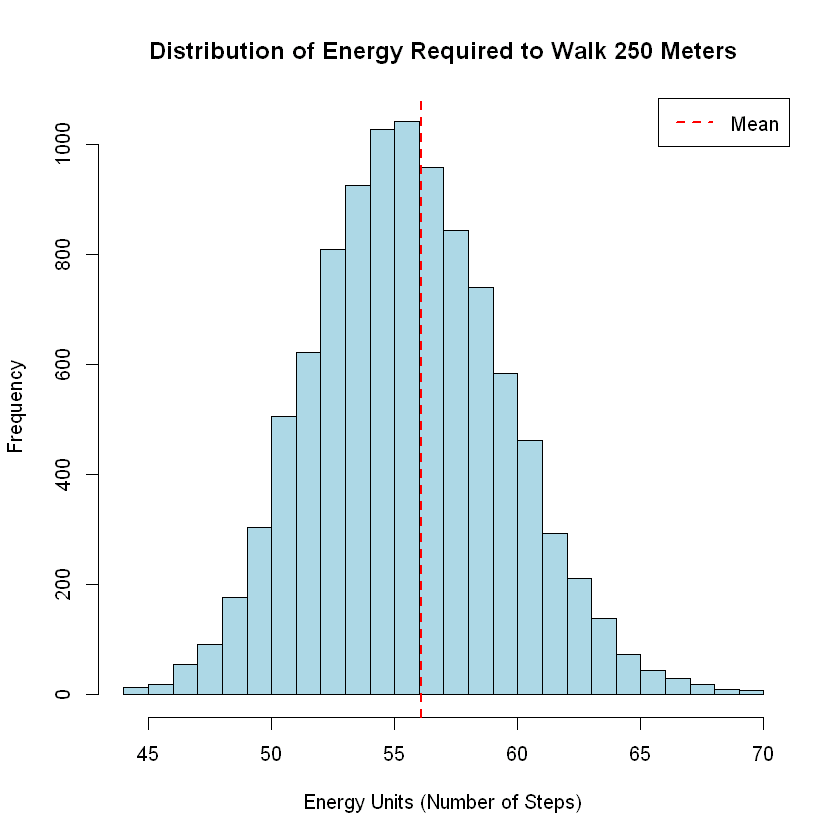

In [14]:
# 2
hist(steps_required, 
     breaks = 30, 
     main = "Distribution of Energy Required to Walk 250 Meters",
     xlab = "Energy Units (Number of Steps)",
     ylab = "Frequency",
     col = "lightblue",
     border = "black")
abline(v = mean(steps_required), col = "red", lwd = 2, lty = 2)
legend("topright", legend = c("Mean"), col = c("red"), lwd = 2, lty = 2)

prob_50_to_90 <- mean(steps_required >= 50 & steps_required <= 90)
cat("Probability of needing energy in the range of 50 to 90 units:", prob_50_to_90, "\n")

<div style="direction:rtl; line-height:180%;">
    <font face="XB Zar" size=3>
            <br>
            میتوان دید که توزیع نمونه تولید شده قابل تعمیم به توزیعی نرمال است و محتمل ترین سظوح انرژِی نزدیک به 56 دیده میشود که با مقدار تئوری میانگین ($\frac{250}{4.5}≈55.56$) مطابقت دارد. باتوجه به توزیع مورد نظر سوال نیز احتمال اینکه انرژِی مورد نیاز در رنج 50 تا 90 باشد بسیار نزدیک به یک است که با انتظارات تئوری نیز مطابقت دارد.<br>
    </font>
</div>


<div style="direction:rtl; line-height:250%;">
    <font face="XB Zar" size=6>
            با آرزوی سلامتی
    </font>
</div>